# Phase 1

In [1]:
from scripts.utils_data import *

## Context 

We have data from the last two years about purchases across 38 different countries.
We have to predict the revenue for the following month. They have also asked that the service be given the ability to project revenue for a specific country. To keep the development time reasonable we have been advised to limit your model to the ten countries with the most revenue.

* Will our model help the managers to save time and increase company profits?
* Will our modell be able to reach an interesting precision in predicting the revenue? 



## Data needed

* Since we are talking about customer purchases, it can be useful to have some information about customers subscription to our streamings platform.
* For the country's model maybe some specific data about the country

## Automated data extraction

To fetch data run:
`!python scripts/utils_data.py`

In [2]:
train_data = pd.read_csv("./data/datasets/df_training.csv")

In [3]:
#extract top 10 countries
df, country_ts, ts_tot = extract_all_datasets(train_data)

In [4]:
#temp.groupby(["year_month","country"]).sum().reset_index()

## Analysis of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797867 entries, 0 to 815010
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       797867 non-null  object 
 1   customer_id   608585 non-null  float64
 2   day           797867 non-null  int64  
 3   invoice       797867 non-null  int64  
 4   month         797867 non-null  int64  
 5   price         797867 non-null  float64
 6   stream_id     797867 non-null  object 
 7   times_viewed  797867 non-null  int64  
 8   year          797867 non-null  int64  
 9   invoice_date  797867 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 67.0+ MB


In [6]:
Profile = ProfileReport(df,title='Pandas Profiling Report', explorative=True)

In [7]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the report stands that we have mainly client from UK (95%). The feature price has some outliers that needs to be removed (negative values) 

In [8]:
train_data = train_data[train_data["price"] >= 0]

In [9]:
df, country_ts, ts_tot = extract_all_datasets(train_data)

In [10]:
df.groupby("country")["price"].mean()

country
EIRE               7.886073
France             4.097903
Germany            3.694648
Hong Kong         52.364384
Netherlands        3.062326
Norway            48.360239
Portugal           7.453813
Singapore         42.502968
Spain              6.155407
United Kingdom     4.869467
Name: price, dtype: float64

In [11]:
country_ts_month = ts_to_monthly(country_ts)
ts_month = ts_to_monthly(ts_tot)

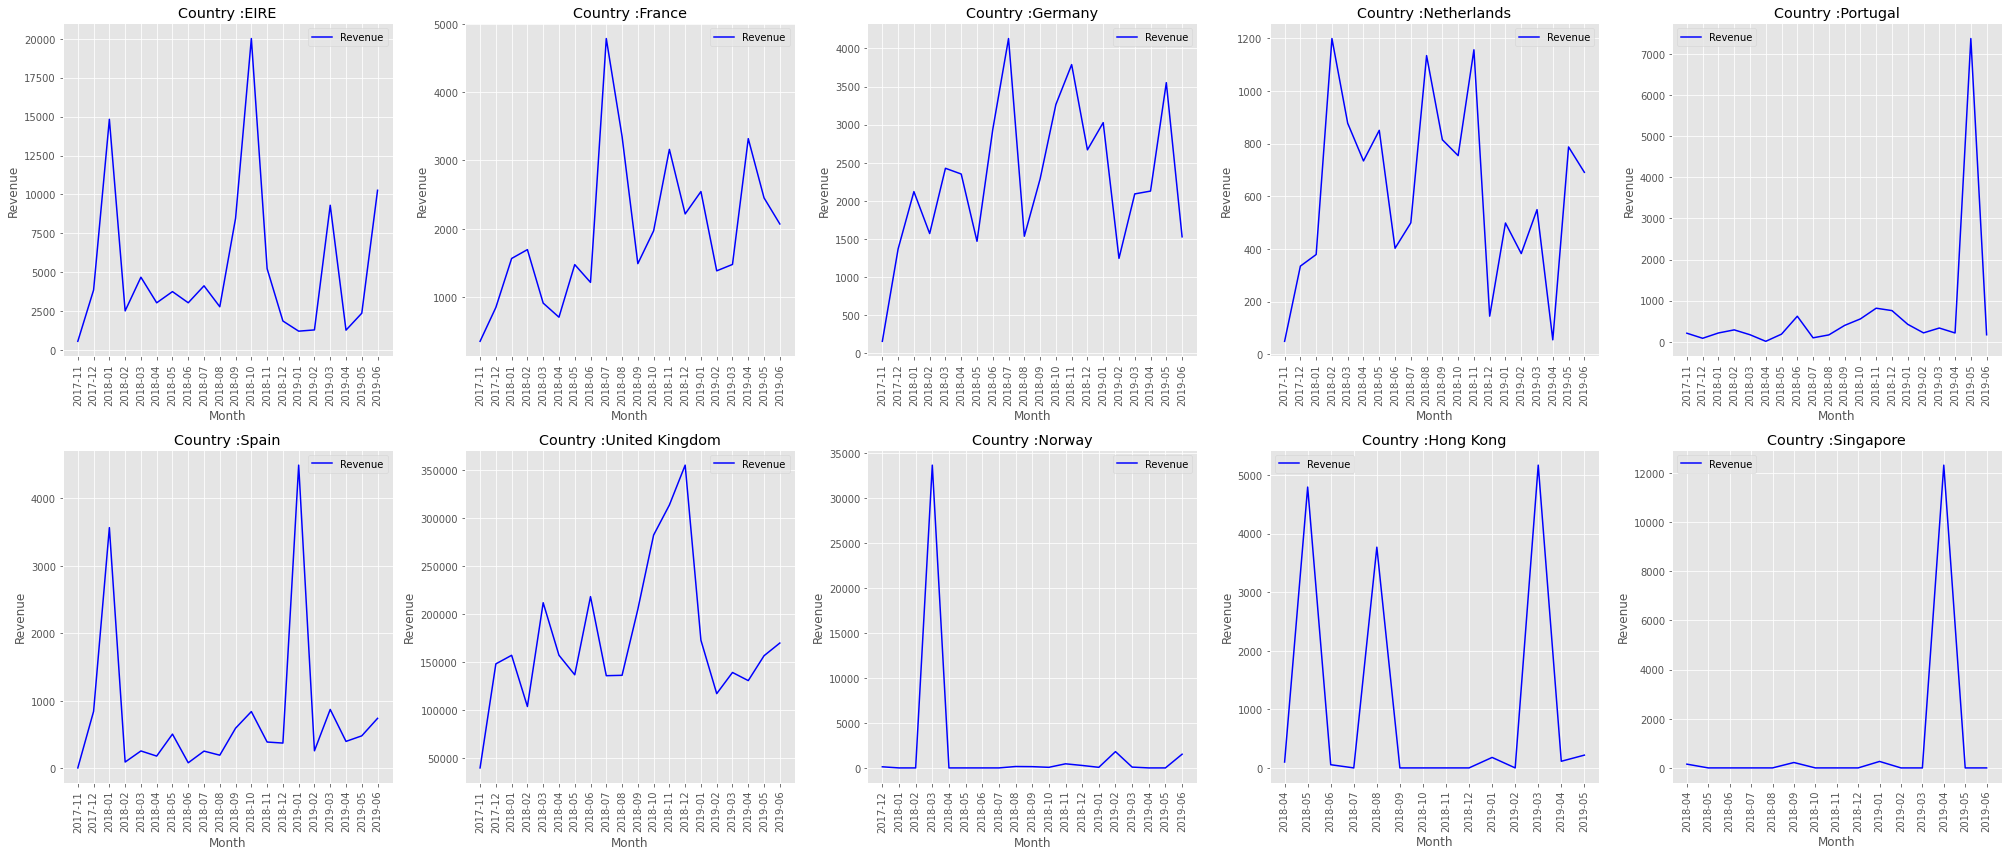

In [14]:
with plt.style.context('ggplot'):
    f, axs = plt.subplots(2, 5, figsize=(28, 12))

    for i,ax in zip(country_ts_month.country.unique(),axs.flat):
        temp = country_ts_month[country_ts_month["country"]==i]
        ax.plot(temp.set_index("year_month")["revenue"],label="Revenue",color="Blue")

        ax.set_title("Country :{}".format(i))
        ax.set_xlabel("Month")
        ax.set_ylabel("Revenue")

        ax.xaxis.set_tick_params(rotation=90)
        ax.legend()


    f.tight_layout()
    plt.show()

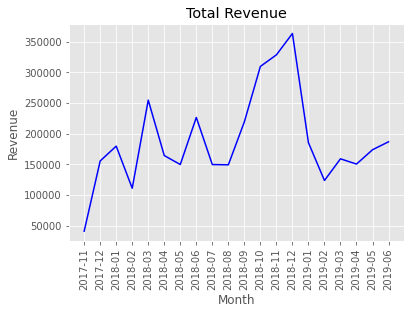

In [19]:
with plt.style.context('ggplot'):
    plt.plot(ts_month.set_index("year_month")["revenue"],label="Revenue",color="Blue")

   # ax.set_title("Country :{}".format(i))
    plt.xlabel("Month")
    plt.ylabel("Revenue")

   # ax.xaxis.set_tick_params(rotation=90)
    #plt.legend()
    plt.xticks(rotation=90)
    plt.title("Total Revenue")

    #f.tight_layout()
    plt.show()